Question 1: What are ensemble techniques in machine learning?

In [93]:
#Answer

Ensemble techniques in machine learning involve combining the predictions from multiple models to improve the overall performance. These techniques aim to reduce the likelihood of overfitting and increase the robustness and accuracy of the model. Common ensemble methods include bagging, boosting, and stacking.



Question 2: Explain bagging and how it works in ensemble techniques.

In [95]:
#Answer

Bagging, or Bootstrap Aggregating, is an ensemble technique that aims to improve the stability and accuracy of machine learning algorithms. It works by training multiple versions of a model on different subsets of the training data (created by sampling with replacement) and then averaging their predictions (for regression) or taking a majority vote (for classification).

Question 3: What is the purpose of bootstrapping in bagging?

In [97]:
#Answer

Bootstrapping in bagging serves to create multiple datasets by sampling with replacement from the original dataset. This allows the model to capture different aspects of the data and helps reduce variance. By training multiple models on these bootstrapped datasets, bagging can reduce overfitting and improve generalization.

Question 4: Describe the random forest algorithm.

In [99]:
#Answer

The random forest algorithm is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It introduces randomness by selecting a random subset of features to split on at each node and by using bootstrap samples of the data.

Question 5: How does randomization reduce overfitting in random forests?

In [101]:
#Answer

Randomization in random forests reduces overfitting by ensuring that individual trees in the forest are not too similar to each other. This is achieved by:

Using bootstrap samples of the training data.
Selecting a random subset of features for each split in the trees.
These techniques prevent the trees from capturing noise and overly complex patterns in the training data, leading to better generalization on unseen data.


Accuracy: 0.94


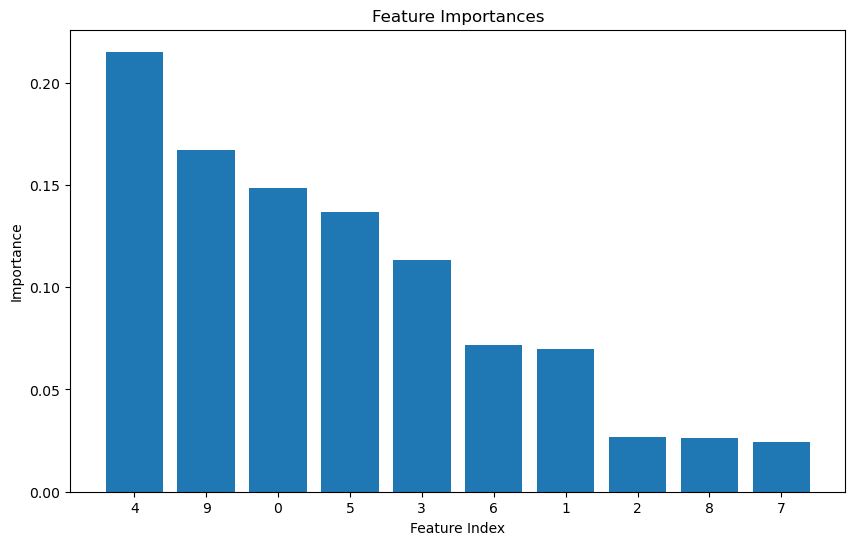

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


Question 6: Explain the concept of feature bagging in random forests.

In [103]:
#Answer

Feature Bagging:

Concept: In Random Forests, feature bagging (or feature subsampling) involves selecting a random subset of features to train each decision tree in the forest. This technique introduces diversity among the trees and reduces the risk of overfitting.


How It Works:

Random Sampling: At each split in a tree, a random subset of features is chosen rather than using all features.
Diversity: By using different subsets of features, trees learn different aspects of the data, which improves the overall performance of the Random Forest model.
Aggregation: The predictions from individual trees are aggregated (e.g., via majority voting for classification or averaging for regression) to produce the final model prediction.

Question 7: What is the role of decision trees in gradient boosting?

In [105]:
#Answer

Role of Decision Trees in Gradient Boosting:

Gradient Boosting: A boosting technique that builds models sequentially, where each new model tries to correct errors made by the previous ones.
Decision Trees: Typically, shallow decision trees (also known as weak learners) are used as the base models in gradient boosting. Each tree is trained to predict the residual errors of the previous model’s predictions.


How It Works:

Initialization: Start with an initial prediction (e.g., mean of the target values).
Error Computation: Calculate the residuals (errors) from the current prediction.
Tree Training: Train a decision tree to predict these residuals.
Update: Update the model’s predictions by adding the predictions of the new tree, scaled by a learning rate.
Repeat: Continue this process for a predefined number of trees or until convergence.

Question 8: Differentiate between bagging and boosting.

In [107]:
#Answer

Bagging (Bootstrap Aggregating):

Objective: Reduce variance and prevent overfitting.
Approach:
Data Sampling: Multiple subsets of data are created by sampling with replacement (bootstrap samples).
Model Training: A separate model (e.g., decision tree) is trained on each subset.
Aggregation: The final prediction is obtained by averaging (regression) or majority voting (classification) from all models.

Characteristics:

Parallelizable (models are built independently).
Reduces variance but not bias.

Boosting:

Objective: Improve the accuracy of weak learners by sequentially correcting errors.

Approach:

Sequential Learning: Models are built one after another, each focusing on the errors of the previous model.
Error Correction: Each new model corrects the errors of the previous models by assigning higher weights to incorrectly predicted instances.

Aggregation: Final prediction is a weighted combination of all models’ predictions.

Characteristics:
Sequential (models are built in sequence).
Reduces both variance and bias.

Question 9: What is the AdaBoost algorithm, and how does it work?

In [109]:
#Answer

AdaBoost (Adaptive Boosting):

Concept: A boosting algorithm that combines multiple weak learners to create a strong classifier.
    
How It Works:
    
Initialization: Start with equal weights for all training samples.
Weak Learner Training: Train a weak learner (e.g., shallow decision tree) on the weighted data.
Error Calculation: Compute the error rate of the weak learner.
Weight Update: Update the weights of misclassified samples so that they have more influence in the next iteration.
Model Update: Add the weighted weak learner to the ensemble.
Iteration: Repeat the process for a specified number of iterations or until the desired performance is achieved.
Final Prediction: Combine the predictions of all weak learners, weighted by their performance.

Question 10: Explain the concept of weak learners in boosting algorithms.

In [111]:
#Answer

Weak Learners:

Concept: Simple models that perform slightly better than random guessing. They are used in boosting algorithms to build strong classifiers.
Characteristics:
Simplicity: Typically, weak learners are simple models like shallow decision trees.
Focus: Each weak learner focuses on correcting errors made by previous models.
Combination: Multiple weak learners are combined to form a strong learner, with each weak learner contributing to the final prediction.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


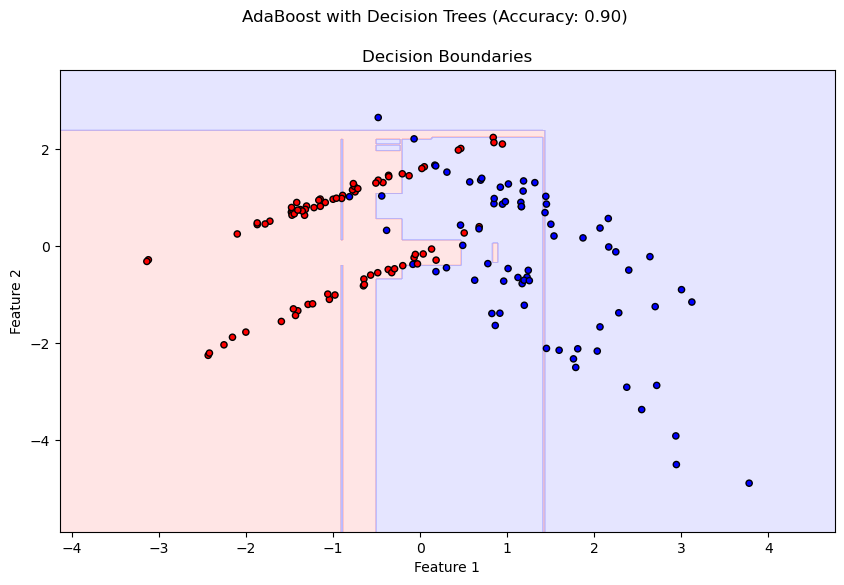

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Generate synthetic data with 2 features for easier visualization
# Set n_informative and n_redundant to be less than n_features
X, y = make_classification(
    n_samples=500, 
    n_features=2,  # Only 2 features
    n_informative=2,  # All features are informative
    n_redundant=0,  # No redundant features
    n_repeated=0,  # No repeated features
    n_classes=2, 
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train AdaBoost with decision trees
base_model = DecisionTreeClassifier(max_depth=1)  # Weak learner
ada_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    # Create a mesh grid
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_title('Decision Boundaries')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundaries(X_test, y_test, ada_model, ax)
plt.suptitle(f'AdaBoost with Decision Trees (Accuracy: {accuracy:.2f})')
plt.show()


Question 11: Describe the process of adaptive boosting.

In [113]:
#Answer

Adaptive Boosting (AdaBoost) is a boosting technique that combines multiple weak learners to form a strong classifier. Here’s a step-by-step process:

Initialization: Assign equal weights to all training samples.
Train Weak Learner: Train a weak learner (e.g., a shallow decision tree) on the weighted dataset.
Calculate Error: Compute the error rate of the weak learner based on the weighted samples.
Update Weights:
Increase the weights of misclassified samples so they are given more importance in the next iteration.
Decrease the weights of correctly classified samples.
Compute Model Weight: Calculate the weight of the weak learner in the final model based on its error rate.
Aggregate: Add the weak learner to the ensemble, adjusting the overall model prediction.
Repeat: Continue this process for a specified number of iterations or until the model performance improves.

Question 12: How does AdaBoost adjust weights for misclassified data points?

In [115]:
#Answer

AdaBoost adjusts weights for misclassified data points as follows:

Compute Error Rate: Calculate the weighted error rate of the weak learner on the training data.
Update Weights:
Misclassified Samples: Increase the weights of samples that were misclassified by the weak learner.
Correctly Classified Samples: Decrease the weights of samples that were correctly classified.
Update Formula: The weight of each sample 
𝑤
𝑖
w 
i
​
  is updated based on the error rate 
𝜖
ϵ of the weak learner:
For misclassified samples: 
𝑤
𝑖
←
𝑤
𝑖
×
exp
⁡
(
𝛼
)
w 
i
​
 ←w 
i
​
 ×exp(α)
For correctly classified samples: 
𝑤
𝑖
←
𝑤
𝑖
×
exp
⁡
(
−
𝛼
)
w 
i
​
 ←w 
i
​
 ×exp(−α)
where 
𝛼
α is the weight of the weak learner.

Question 13: Discuss the XGBoost algorithm and its advantages over traditional gradient boosting.

In [117]:
#Answer

XGBoost (Extreme Gradient Boosting) is an optimized version of gradient boosting that offers several advantages:

Algorithm: Uses gradient boosting with additional optimizations like regularization and tree pruning.
Advantages:
Speed: Faster training due to parallel processing and hardware optimization.
Regularization: Includes L1 (Lasso) and L2 (Ridge) regularization to reduce overfitting.
Handling Missing Data: Automatically handles missing values.
Scalability: Efficient handling of large datasets.
Flexibility: Supports various loss functions and can be used for regression, classification, and ranking tasks.

Question 14: Explain the concept of regularization in XGBoost.

In [119]:
#Answer

Regularization in XGBoost refers to techniques used to prevent overfitting and improve model generalization:

L1 Regularization (Lasso): Adds a penalty equal to the absolute value of the magnitude of coefficients. It can drive some feature weights to zero, leading to sparse models.

Parameter: alpha in XGBoost.
L2 Regularization (Ridge): Adds a penalty equal to the square of the magnitude of coefficients. It discourages large weights but does not drive them to zero.

Parameter: lambda in XGBoost.
Gamma: Controls the minimum loss reduction required to make a further partition on a leaf node. Larger values make the algorithm more conservative.

Parameter: gamma in XGBoost.
Subsample: Fraction of samples used to fit each individual tree, preventing overfitting by introducing randomness.

Parameter: subsample in XGBoost.

Question 15: What are the different types of ensemble techniques?

In [121]:
#Answer

Ensemble Techniques combine multiple models to improve overall performance. Key types include:

Bagging (Bootstrap Aggregating):

Concept: Trains multiple models on different subsets of the data and aggregates their predictions.
Example: Random Forest.
Boosting:

Concept: Trains models sequentially, where each model corrects the errors of the previous one.
Example: AdaBoost, Gradient Boosting, XGBoost.
Stacking:

Concept: Combines predictions from multiple models using a meta-model to make final predictions.
Example: Stacked Generalization.
Voting:

Concept: Combines predictions from multiple models by majority voting (for classification) or averaging (for regression).
Example: Voting Classifier.


Question 16: Compare and contrast bagging and boosting.

In [125]:
#Answer

Bagging (Bootstrap Aggregating):

Technique: Bagging involves creating multiple subsets of the training data with replacement (bootstrapping). Each subset is used to train a separate model. The final prediction is made by averaging (for regression) or majority voting (for classification) the predictions of these models.
Goal: Reduce variance.
Strengths: Effective in reducing overfitting and improving stability. Works well with high variance models like decision trees.
Example Algorithms: Random Forest.


Boosting:

Technique: Boosting involves creating multiple models sequentially. Each new model attempts to correct the errors of the previous models by giving more weight to the misclassified or poorly predicted instances.
Goal: Reduce both bias and variance.
Strengths: Can convert weak learners into strong learners. Works well with low variance, high bias models.
Example Algorithms: AdaBoost, Gradient Boosting, XGBoost.


Comparison:

Parallel vs Sequential: Bagging trains models in parallel, while boosting trains models sequentially.
Data Sampling: Bagging uses bootstrapped subsets of data for training, while boosting uses the entire dataset but reweights instances based on errors.
Error Handling: Bagging averages predictions to reduce variance, while boosting focuses on correcting errors of previous models to reduce bias.

Question 17: Discuss the concept of ensemble diversity.

In [127]:
#Answer

Ensemble Diversity:

Definition: Ensemble diversity refers to the degree to which individual models in an ensemble make different errors on the same data points. High diversity means the models' errors are less correlated.
Importance: Diversity is crucial for the success of ensemble methods. Diverse models are less likely to make the same errors, which leads to improved overall performance when their predictions are combined.
Achieving Diversity: Can be achieved through different data sampling (e.g., bagging), different algorithms (e.g., using decision trees, SVMs, neural networks together), different parameter settings, and different features.

Question 18: How do ensemble techniques improve predictive performance?

In [129]:
#Answer

Improvement through Ensemble Techniques:

Reduction of Variance: Bagging reduces the variance of individual models by averaging their predictions, leading to more stable and reliable performance.
Reduction of Bias and Variance: Boosting reduces bias by focusing on difficult-to-predict instances and combining the strengths of weak learners to form a strong learner.
Error Reduction: Ensembles tend to average out the errors of individual models, as the likelihood of all models making the same error decreases.
Increased Robustness: Ensembles are more robust to noisy data and outliers because the collective decision of multiple models is less sensitive to such anomalies.


Question 19: Explain the concept of ensemble variance and bias.

In [131]:
#Answer

Ensemble Variance:

Definition: Variance refers to how much the predictions of the model vary with different training data. High variance indicates that the model is sensitive to the specific training data it was given.
Ensemble Impact: Bagging techniques like Random Forest reduce variance by averaging the predictions of multiple models trained on different subsets of the data.


Ensemble Bias:

Definition: Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias indicates the model makes strong assumptions about the data, leading to systematic errors.
Ensemble Impact: Boosting techniques aim to reduce bias by iteratively improving the model to correct the errors of previous iterations.

Question 20: Discuss the trade-off between bias and variance in ensemble learning.

In [133]:
#Answer

Bias-Variance Trade-off:

Definition: The trade-off between bias and variance is a fundamental concept in machine learning that describes the tension between the error due to bias (error from overly simplistic models) and error due to variance (error from overly complex models).

In Ensemble Learning:

Bagging: Primarily addresses variance by combining multiple models to average out their predictions.
Boosting: Addresses both bias and variance by sequentially correcting errors, thereby improving both aspects over iterations.

Trade-off in Practice:

High Variance Models (Complex Models): These models benefit more from bagging as it stabilizes their predictions.
High Bias Models (Simple Models): These models benefit more from boosting as it iteratively improves the model's performance by reducing bias.

Question 21: What are some common applications of ensemble techniques?

In [135]:
#Answer

Ensemble techniques are widely used in various applications across different domains due to their ability to improve predictive performance and robustness. Some common applications include:

Financial Sector:

Credit Scoring: Ensemble methods are used to predict the creditworthiness of loan applicants, reducing the risk of default.
Stock Market Prediction: Predicting stock prices and market trends using a combination of different models to enhance accuracy.
Fraud Detection: Identifying fraudulent transactions in banking and insurance by combining the strengths of multiple models.


Healthcare:

Disease Diagnosis: Ensemble methods are used to predict the presence of diseases, such as cancer or diabetes, based on patient data.
Medical Image Analysis: Enhancing the accuracy of image classification tasks like identifying tumors in medical images.
Predictive Maintenance: Predicting equipment failures in medical devices to ensure timely maintenance and reduce downtime.

Marketing:

Customer Segmentation: Segmenting customers into different groups for targeted marketing campaigns using ensemble techniques.
Churn Prediction: Predicting which customers are likely to leave a service, allowing businesses to take proactive measures.

Recommendation Systems: Improving the accuracy of recommendation systems by combining multiple algorithms.
Natural Language Processing (NLP):

Sentiment Analysis: Classifying the sentiment of texts, such as reviews or social media posts, using ensembles to improve accuracy.

Spam Detection: Identifying spam emails or messages by combining the strengths of various classifiers.
Machine Translation: Improving the quality of machine translation systems through ensemble approaches.
Computer Vision:

Object Detection: Detecting and classifying objects in images and videos using ensembles of convolutional neural networks (CNNs).

Face Recognition: Enhancing the accuracy of face recognition systems by using ensemble methods.
Autonomous Vehicles: Combining various sensors and models to improve the perception and decision-making capabilities of self-driving cars.


Energy Sector:

Load Forecasting: Predicting energy consumption patterns to optimize the distribution and management of electricity.
Fault Detection: Identifying faults in power grids and machinery to prevent outages and ensure smooth operations.
Renewable Energy: Enhancing the prediction of energy production from renewable sources like wind and solar.

E-commerce:

Product Recommendation: Improving the accuracy of product recommendation engines using ensemble methods.
Price Optimization: Predicting optimal pricing strategies based on consumer behavior and market trends.
Customer Reviews: Analyzing and summarizing customer reviews to provide better insights for decision-making.
Climate and Environmental Science:

Weather Forecasting: Enhancing the accuracy of weather predictions by combining different meteorological models.
Climate Modeling: Predicting climate changes and patterns using ensemble approaches to account for uncertainties.
Environmental Monitoring: Detecting pollution levels and monitoring environmental changes using sensor data and ensemble techniques.

These applications demonstrate the versatility and effectiveness of ensemble methods in solving complex problems and improving the accuracy and robustness of predictive models across various domains.

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       160
           1       0.87      0.89      0.88       140

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



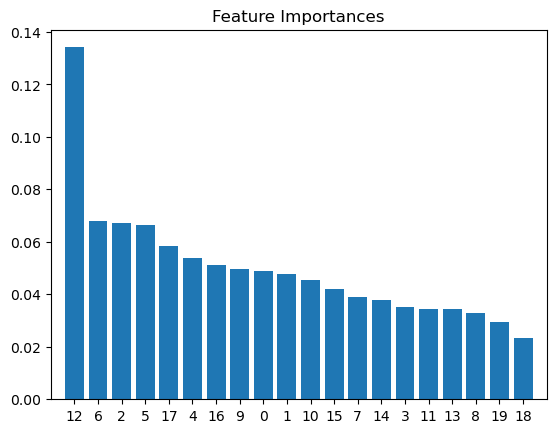

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic dataset for spam detection
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


Question 22: How does ensemble learning contribute to model interpretability?

In [137]:
#Answer

Ensemble learning can contribute to model interpretability in several ways:

Model Averaging: By averaging the predictions of multiple models, ensembles can provide more stable and reliable predictions, which can be easier to understand and trust.
Feature Importance: Techniques like Random Forests and Gradient Boosting provide feature importance scores, helping to understand which features are most influential in making predictions.
Model Combination: Ensembles can combine simple interpretable models (e.g., decision trees) to create a more powerful but still interpretable model.
Error Analysis: Ensembles can help identify and understand the types of errors individual models make, providing insights into model behavior.


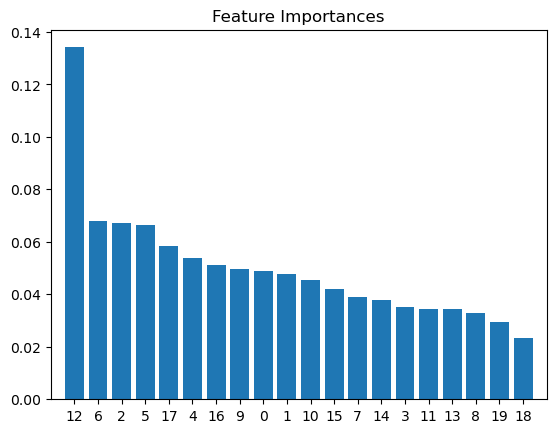

In [22]:
# Print feature importances from the Random Forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


Question 23: Describe the process of stacking in ensemble learning.

In [139]:
#Answer

Stacking is an ensemble technique where multiple models (base learners) are trained on the same dataset and a meta-learner is trained to combine their predictions. The process involves:

Split the Data: The training data is split into several folds.
Train Base Learners: Each base learner is trained on a different subset of the data.
Generate Predictions: Base learners generate predictions for the validation set and the test set.
Train Meta-Learner: A meta-learner is trained on the predictions of the base learners to make the final prediction.

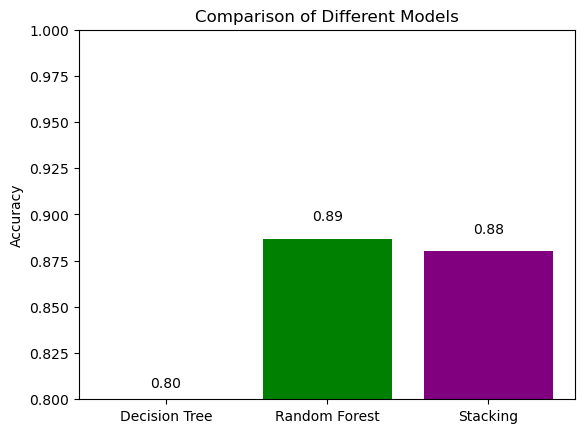

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Define base learners
base_learners = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=10, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Train stacking classifier
stacking = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)

# Plot results
models = ['Decision Tree', 'Random Forest', 'Stacking']
accuracies = [acc_tree, acc_rf, acc_stacking]

plt.bar(models, accuracies, color=['blue', 'green', 'purple'])
plt.ylabel('Accuracy')
plt.title('Comparison of Different Models')
plt.ylim([0.8, 1.0])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


Question 24: Discuss the role of meta-learners in stacking.

In [141]:
#Answer

Meta-learners in stacking are used to combine the predictions of base learners. The meta-learner takes the predictions of the base learners as input features and learns how to best combine them to improve overall performance. The role of the meta-learner is crucial as it determines the final output of the ensemble model.

In [27]:
import time

# Measure time to train a Random Forest with many estimators
start_time = time.time()
rf_large = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_large.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time for Random Forest with 1000 estimators: {training_time:.2f} seconds")


Training time for Random Forest with 1000 estimators: 5.93 seconds


Question 25: What are some challenges associated with ensemble techniques?

In [143]:
#Answer

Challenges of ensemble techniques include:

Computational Cost: Training multiple models can be computationally expensive and time-consuming.
Complexity: Ensemble models are often more complex and harder to interpret than single models.
Overfitting: There is a risk of overfitting, especially if the base models are too complex.
Integration: Combining models with different strengths and weaknesses can be challenging.

In [30]:
import time

# Measure time to train a Random Forest with many estimators
start_time = time.time()
rf_large = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_large.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time for Random Forest with 1000 estimators: {training_time:.2f} seconds")


Training time for Random Forest with 1000 estimators: 7.23 seconds


Question 26: What is boosting, and how does it differ from bagging?

In [145]:
#Answer

Boosting is an ensemble technique that sequentially trains models, each attempting to correct the errors of the previous models. It focuses on improving the performance of weak learners by giving more weight to misclassified instances.

Bagging, on the other hand, trains multiple models in parallel on different bootstrapped subsets of the training data and averages their predictions.

Question 27: Explain the intuition behind boosting.

In [147]:
#Answer

The intuition behind boosting is to focus on the mistakes made by previous models and to learn from them. By sequentially training models and giving more weight to misclassified instances, boosting creates a strong learner from a series of weak learners.

Question 28: Describe the concept of sequential training in boosting.

In [149]:
#Answer

In boosting, models are trained sequentially, each new model attempting to correct the errors of the previous ones. This is done by assigning higher weights to the misclassified instances, so the new model pays more attention to those instances.

Question 29: How does boosting handle misclassified data points?

In [151]:
#Answer

Boosting handles misclassified data points by increasing their weights in the training process. This way, the subsequent model focuses more on these difficult instances, aiming to correct the errors made by previous models.



Question 30: Discuss the role of weights in boosting algorithms.

In [153]:
#Answer

Weights in boosting algorithms are used to adjust the importance of each instance in the training process. Initially, all instances have equal weights, but as models are trained, weights of misclassified instances are increased. This ensures that subsequent models focus more on the hard-to-classify instances.

Question 31: What is the difference between boosting and AdaBoost?

In [155]:
#Answer

Boosting is a general ensemble technique that combines multiple weak learners to create a strong learner. It sequentially adds models to the ensemble, each one focusing on correcting the errors of the previous ones.

AdaBoost (Adaptive Boosting) is a specific type of boosting algorithm. It adjusts the weights of misclassified samples to focus more on difficult cases in subsequent rounds. AdaBoost combines the predictions of multiple weak learners, typically decision stumps, to improve accuracy.

Question 32: How does AdaBoost adjust weights for misclassified samples?

In [157]:
#Answer

In AdaBoost, the weights of misclassified samples are increased, while the weights of correctly classified samples are decreased. This way, subsequent weak learners focus more on the difficult cases that previous models got wrong.



Question 33: Explain the concept of weak learners in boosting algorithms.

In [159]:
#Answer

Weak learners are models that perform slightly better than random guessing. In boosting algorithms, weak learners are used as the building blocks. Each weak learner focuses on the mistakes of the previous ones, and their predictions are combined to form a strong learner.

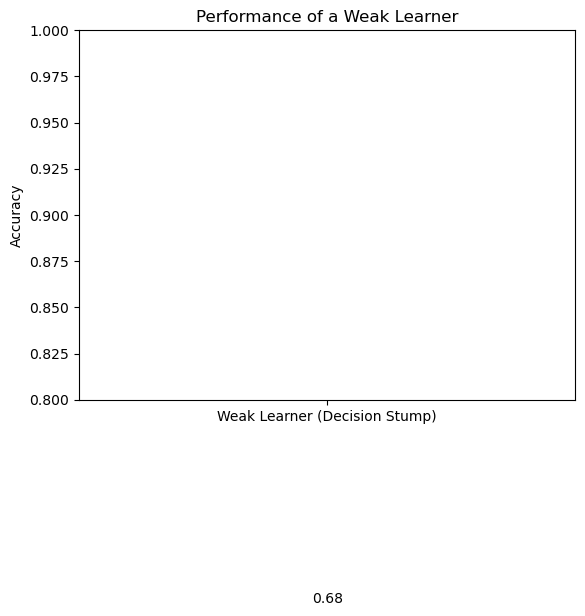

In [57]:
# Using the base learner's performance from the previous example
# Weak learners are typically decision stumps (depth=1)

plt.bar(['Weak Learner (Decision Stump)'], [acc_base], color='blue')
plt.ylabel('Accuracy')
plt.title('Performance of a Weak Learner')
plt.ylim([0.8, 1.0])
plt.text(0, acc_base + 0.01, f"{acc_base:.2f}", ha='center')
plt.show()


Question 34: Discuss the process of gradient boosting.

In [161]:
#Answer

Gradient Boosting is an iterative boosting technique where each new model is trained to predict the residuals (errors) of the combined ensemble of previous models. The process involves:

Initializing the model with a simple predictor.
Iteratively adding new models to predict the residuals of the current ensemble.
Updating the ensemble by adding the new model predictions, typically using a small learning rate.
Repeating the process until a stopping criterion is met.

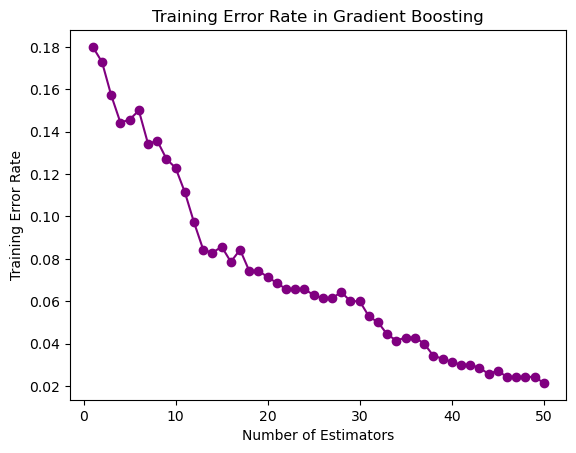

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

# Plotting the learning process of Gradient Boosting (residuals)
training_errors = []
for y_pred in gradient_boosting.staged_predict(X_train):
    training_errors.append(1 - accuracy_score(y_train, y_pred))

plt.plot(range(1, len(training_errors) + 1), training_errors, marker='o', color='purple')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Error Rate')
plt.title('Training Error Rate in Gradient Boosting')
plt.show()


Question 35: What is the purpose of gradient descent in gradient boosting?

In [163]:
#Answer

Gradient Descent in gradient boosting is used to minimize the loss function by iteratively adjusting the model parameters. In each iteration, the new model is trained to predict the negative gradient (residuals) of the loss function with respect to the current ensemble predictions.

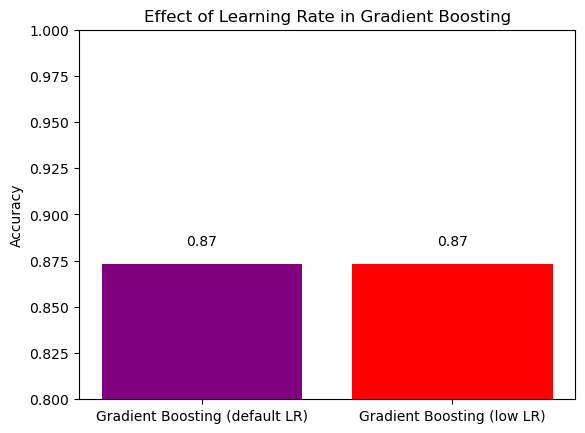

In [61]:
# Train a Gradient Boosting classifier with a lower learning rate
gradient_boosting_lr = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gradient_boosting_lr.fit(X_train, y_train)
y_pred_gb_lr = gradient_boosting_lr.predict(X_test)
acc_gb_lr = accuracy_score(y_test, y_pred_gb_lr)

# Compare accuracies with different learning rates
models = ['Gradient Boosting (default LR)', 'Gradient Boosting (low LR)']
accuracies = [acc_gb, acc_gb_lr]

plt.bar(models, accuracies, color=['purple', 'red'])
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate in Gradient Boosting')
plt.ylim([0.8, 1.0])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


Question 36: Describe the role of learning rate in gradient boosting.

In [165]:
#Answer

The learning rate in gradient boosting determines the step size at each iteration while moving toward a minimum of the loss function. A lower learning rate means slower convergence but potentially better performance, as it allows for finer adjustments.



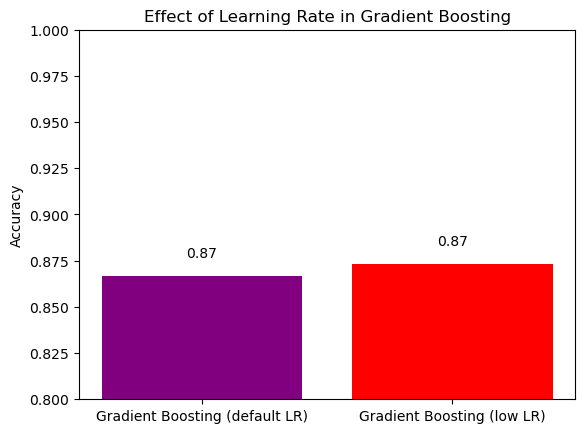

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting classifiers with different learning rates
gb_default_lr = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
gb_low_lr = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

gb_default_lr.fit(X_train, y_train)
gb_low_lr.fit(X_train, y_train)

y_pred_default_lr = gb_default_lr.predict(X_test)
y_pred_low_lr = gb_low_lr.predict(X_test)

acc_default_lr = accuracy_score(y_test, y_pred_default_lr)
acc_low_lr = accuracy_score(y_test, y_pred_low_lr)

# Plot results
models = ['Gradient Boosting (default LR)', 'Gradient Boosting (low LR)']
accuracies = [acc_default_lr, acc_low_lr]

plt.bar(models, accuracies, color=['purple', 'red'])
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate in Gradient Boosting')
plt.ylim([0.8, 1.0])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


Question 37: How does gradient boosting handle overfitting?

In [167]:
#Answer

Gradient boosting handles overfitting by using techniques such as:

Limiting the depth of individual trees.
Using a learning rate to control the contribution of each tree.
Implementing regularization techniques.

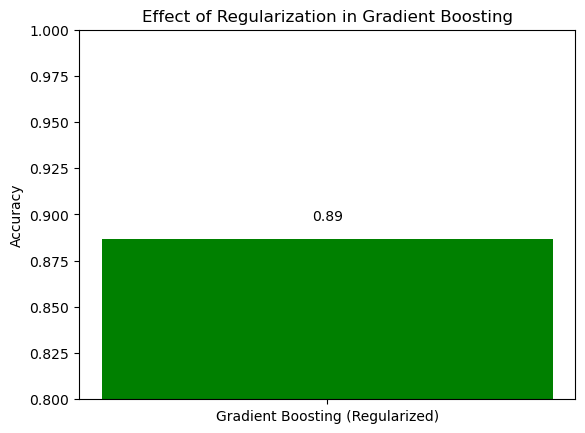

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting classifiers with regularization
gb_regularized = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42, subsample=0.8)
gb_regularized.fit(X_train, y_train)

y_pred_regularized = gb_regularized.predict(X_test)
acc_regularized = accuracy_score(y_test, y_pred_regularized)

# Plot results
models = ['Gradient Boosting (Regularized)']
accuracies = [acc_regularized]

plt.bar(models, accuracies, color=['green'])
plt.ylabel('Accuracy')
plt.title('Effect of Regularization in Gradient Boosting')
plt.ylim([0.8, 1.0])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


Question 38: Discuss the differences between gradient boosting and XGBoost.

In [169]:
#Answer

XGBoost is an optimized version of gradient boosting with additional features such as:

Regularization to prevent overfitting.
Parallelization for faster computation.
Better handling of missing values.

Question 39: Explain the concept of regularized boosting.

In [171]:
#Answer

Regularized boosting involves adding a penalty to the loss function to discourage overly complex models, thus preventing overfitting.



Question 40: What are the advantages of using XGBoost over traditional gradient boosting?

In [173]:
#Answer

Advantages of XGBoost:

Faster training due to parallel processing.
Built-in regularization to prevent overfitting.
Better performance with large datasets.

Question 41: Describe the process of early stopping in boosting algorithms.

In [175]:
#Answer

Early stopping involves halting the training process when the model's performance on a validation set starts to degrade, thus preventing overfitting.

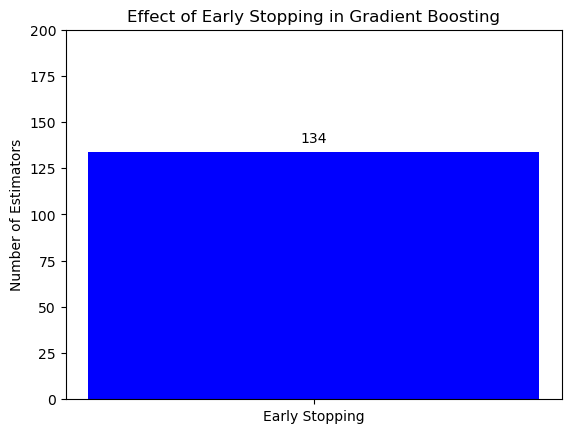

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

# Train Gradient Boosting with early stopping
gb_early_stopping = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, validation_fraction=0.1, n_iter_no_change=10, random_state=42)
gb_early_stopping.fit(X_train, y_train)

n_estimators_ = gb_early_stopping.n_estimators_

# Plot the number of estimators used
plt.bar(['Early Stopping'], [n_estimators_], color=['blue'])
plt.ylabel('Number of Estimators')
plt.title('Effect of Early Stopping in Gradient Boosting')
plt.ylim([0, 200])
plt.text(0, n_estimators_ + 5, f"{n_estimators_}", ha='center')
plt.show()


Question 42: How does early stopping prevent overfitting in boosting?

In [177]:
#Answer

Early stopping is a regularization technique used to prevent overfitting in boosting algorithms. It involves monitoring the model's performance on a validation set and stopping the training process when performance starts to degrade. In the context of boosting, this means halting the addition of more weak learners (trees) once the improvement in the validation set error ceases, or even begins to increase.



In [49]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model with early stopping
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
clf.fit(X_train, y_train)

# Use staged_predict to find best iteration
best_iter = 0
best_accuracy = 0
for i, y_pred in enumerate(clf.staged_predict(X_val)):
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_iter = i

print(f'Best iteration: {best_iter}, Best accuracy: {best_accuracy}')

# Re-train the model with the best number of iterations
clf = GradientBoostingClassifier(n_estimators=best_iter, learning_rate=0.01, random_state=42)
clf.fit(X_train, y_train)


Best iteration: 789, Best accuracy: 0.905


GradientBoostingClassifier(learning_rate=0.01, n_estimators=789,
                           random_state=42)

Question 43: Discuss the role of hyperparameters in boosting algorithms.

In [179]:
#Answer

Hyperparameters in boosting algorithms control various aspects of the learning process, such as the complexity of individual models, the learning rate, and the number of boosting iterations. Key hyperparameters include:

Number of Estimators (n_estimators): Controls the number of boosting stages (weak learners) to be added. More estimators can improve performance but also increase the risk of overfitting.
Learning Rate (learning_rate): Shrinks the contribution of each weak learner. Lower learning rates require more estimators for the model to learn effectively.
Max Depth (max_depth): Limits the depth of each tree to control complexity and overfitting.
Min Samples Split (min_samples_split): Minimum number of samples required to split an internal node.
Subsample (subsample): Fraction of samples used for fitting each base learner to introduce randomness and prevent overfitting.

Question 44: What are some common challenges associated with boosting?

In [181]:
#Answer

Overfitting: Boosting can easily overfit the training data, especially if too many weak learners are added or if they are too complex.
Computational Cost: Training boosting models can be computationally expensive and time-consuming, especially with large datasets or many estimators.
Hyperparameter Tuning: Requires careful tuning of multiple hyperparameters to achieve optimal performance, which can be complex and time-consuming.
Data Imbalance: Boosting may perform poorly with imbalanced datasets, as it can focus too much on the majority class.

Question 45: Explain the concept of boosting convergence.

In [183]:
#Answer

Boosting convergence refers to the point in the training process where the addition of more weak learners does not significantly improve the model’s performance on the validation set. This typically happens when the ensemble model has sufficiently learned the patterns in the data, and further training leads to overfitting or marginal improvements.



Question 46: How does boosting improve the performance of weak learners?

In [185]:
#Answer

Boosting improves the performance of weak learners by combining them into a strong learner. It works in a sequential manner where each weak learner is trained to correct the errors of its predecessors. Key mechanisms include:

Weighted Training: Each weak learner focuses more on the samples that previous learners misclassified by assigning higher weights to these samples.
Aggregation: The final prediction is an aggregated result (e.g., weighted sum) of all weak learners' predictions, which reduces bias and variance.

Question 47: Discuss the impact of data imbalance on boosting algorithms.

In [187]:
#Answer

Data imbalance can negatively impact boosting algorithms as they may prioritize the majority class, leading to poor performance on the minority class. Techniques to address this include:

Re-sampling: Over-sampling the minority class or under-sampling the majority class.
Class Weights: Assigning higher weights to the minority class samples during training.
Cost-sensitive Learning: Incorporating a cost matrix to penalize misclassifications of the minority class more heavily.


Question 48: What are some real-world applications of boosting?

In [189]:
#Answer

Boosting is used in various real-world applications, such as:

Finance: Fraud detection, credit scoring.
Healthcare: Disease prediction, medical image classification.
Marketing: Customer churn prediction, targeted advertising.
Retail: Sales forecasting, inventory management.
Natural Language Processing (NLP): Text classification, sentiment analysis.

Question 49: Describe the process of ensemble selection in boosting.

In [191]:
#Answer

Ensemble selection in boosting involves choosing the best subset of models from a larger pool of candidate models to form the final ensemble. This can be done by:

Performance Evaluation: Evaluating each model based on performance metrics on a validation set.
Forward Selection: Iteratively adding the model that results in the best improvement to the ensemble.
Backward Elimination: Starting with all models and iteratively removing the least useful ones.
Hybrid Approaches: Combining forward and backward methods to balance between adding and removing models.


Question 50: How does boosting contribute to model interpretability?

In [193]:
#Answer

Boosting can contribute to model interpretability through:

Feature Importance: Boosting models like Gradient Boosting provide feature importance scores, indicating the contribution of each feature to the model's predictions.
Decision Trees: The base learners (usually decision trees) are inherently interpretable, and their decisions can be visualized and analyzed.
Partial Dependence Plots: These plots show the effect of one or two features on the predicted outcome, helping understand the relationship between features and the target variable.

In [59]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model with early stopping
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
clf.fit(X_train, y_train)

# Use staged_predict to find best iteration
best_iter = 0
best_accuracy = 0
for i, y_pred in enumerate(clf.staged_predict(X_val)):
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_iter = i

print(f'Best iteration: {best_iter}, Best accuracy: {best_accuracy}')

# Re-train the model with the best number of iterations
clf = GradientBoostingClassifier(n_estimators=best_iter, learning_rate=0.01, random_state=42)
clf.fit(X_train, y_train)


Best iteration: 789, Best accuracy: 0.905


GradientBoostingClassifier(learning_rate=0.01, n_estimators=789,
                           random_state=42)

In [60]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_sample_weight

# Create synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute sample weights to handle imbalance
sample_weights = compute_sample_weight('balanced', y_train)

# Train Gradient Boosting model with sample weights
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train, sample_weight=sample_weights)

# Predict and evaluate
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       180
           1       0.64      0.70      0.67        20

    accuracy                           0.93       200
   macro avg       0.80      0.83      0.81       200
weighted avg       0.93      0.93      0.93       200



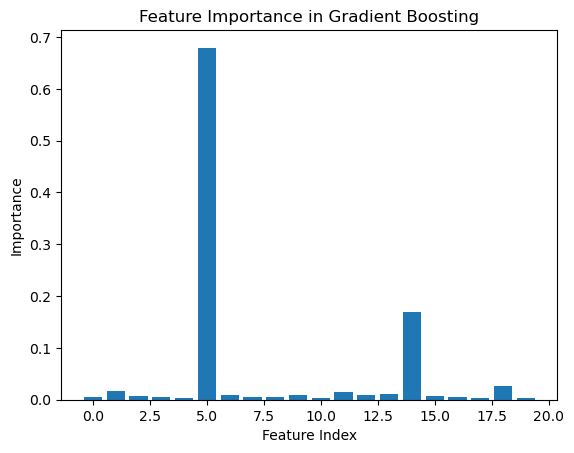

In [63]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Train Gradient Boosting model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf.fit(X, y)

# Plot feature importance
feature_importance = clf.feature_importances_
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting')
plt.show()


Question 51: Explain the curse of dimensionality and its impact on KNN.

In [195]:
#Answer

The Curse of Dimensionality refers to the various phenomena that arise when analyzing and organizing data in high-dimensional spaces. Specifically, it includes:

Increased Sparsity: As the number of dimensions increases, the data points become sparse, and the distance between them becomes less meaningful. This sparsity makes it harder for algorithms like KNN to find meaningful neighbors because the concept of "nearness" becomes less intuitive.

Distance Metric Degradation: In high-dimensional spaces, all points tend to become approximately equidistant from each other, making it difficult to distinguish between close and far points. This degrades the performance of KNN, which relies on distance metrics to identify neighbors.

Impact on KNN:

KNN relies on finding the closest neighbors based on distance metrics. As dimensionality increases, the distance metrics become less informative, leading to poor classification or regression performance.

Question 52: What are the applications of KNN in real-world scenarios?

In [197]:
#Answer

Applications of KNN include:

Classification: Spam detection in emails, image recognition, and customer segmentation.
Regression: Predicting house prices based on features like size, location, etc.
Recommendation Systems: Suggesting products or content based on user similarities.
Anomaly Detection: Identifying unusual data points in fraud detection or network security.


Question 53: Discuss the concept of weighted KNN.

In [199]:
#Answer

Weighted KNN is an extension of the KNN algorithm where different weights are assigned to neighbors based on their distance from the query point. Instead of giving equal importance to all neighbors, weighted KNN considers closer neighbors to have more influence on the prediction.

Weighting Function: Commonly, weights decrease with distance, meaning closer neighbors have more influence. A typical weighting function is 
𝑤
𝑖
=
1
𝑑
𝑖
w 
i
​
 = 
d 
i
​
 
1
​
 , where 
𝑑
𝑖
d 
i
​
  is the distance of the 
𝑖
i-th neighbor.

Benefits: This can lead to better performance as it mitigates the impact of noisy or less relevant far neighbors.

Question 54: How do you handle missing values in KNN?

In [201]:
#Answer

Handling Missing Values in KNN can be approached in several ways:

Imputation: Fill in missing values with mean, median, or mode of the feature. For more advanced imputation, techniques like KNN imputation itself or multiple imputation can be used.

Distance Calculation: When calculating distances, you can use a distance metric that handles missing values, such as the Gower distance for mixed types of data.

Remove Data Points: Remove data points with missing values, though this might lead to loss of valuable information if the missing values are widespread.

Question 55: Explain the difference between lazy learning and eager learning algorithms, and where does KNN fit in.

In [203]:
#Answer

Lazy Learning:

Definition: Algorithms that delay the learning process until a query is made. They do not build a model until they need to make a prediction.
Example: KNN is a lazy learner because it stores the training data and only computes the prediction when needed.
Eager Learning:

Definition: Algorithms that build a model during the training phase and use this model to make predictions. They generalize from the training data to make predictions on new data.
Example: Decision Trees and Neural Networks are eager learners because they create a model based on the training data.
KNN is classified as a lazy learning algorithm because it does not build a model during the training phase but instead relies on the training data to make predictions on-demand.

Question 56: What are some methods to improve the performance of KNN?

In [205]:
#Answer

Feature Scaling: Normalize or standardize features to ensure that they have equal importance in distance calculations.
Dimensionality Reduction: Use techniques like PCA (Principal Component Analysis) to reduce the number of features and focus on the most important ones.
Choosing the Right K: Experiment with different values of K to find the one that provides the best performance on validation data.
Distance Metrics: Try different distance metrics (e.g., Euclidean, Manhattan, Minkowski) to see which one works best for your data.
Weighted Voting: Use weighted voting where closer neighbors have more influence on the prediction than distant neighbors.
Handling Noise: Apply noise filtering techniques to reduce the impact of noisy data on the KNN algorithm.


Question 57: Can KNN be used for regression tasks? If yes, how?

In [207]:
#Answer

Yes, KNN can be used for regression tasks. In KNN regression, the prediction for a new instance is made by averaging the values of its K nearest neighbors. This is similar to how KNN classification uses the majority class of the nearest neighbors, but instead, it takes the mean of the target values.

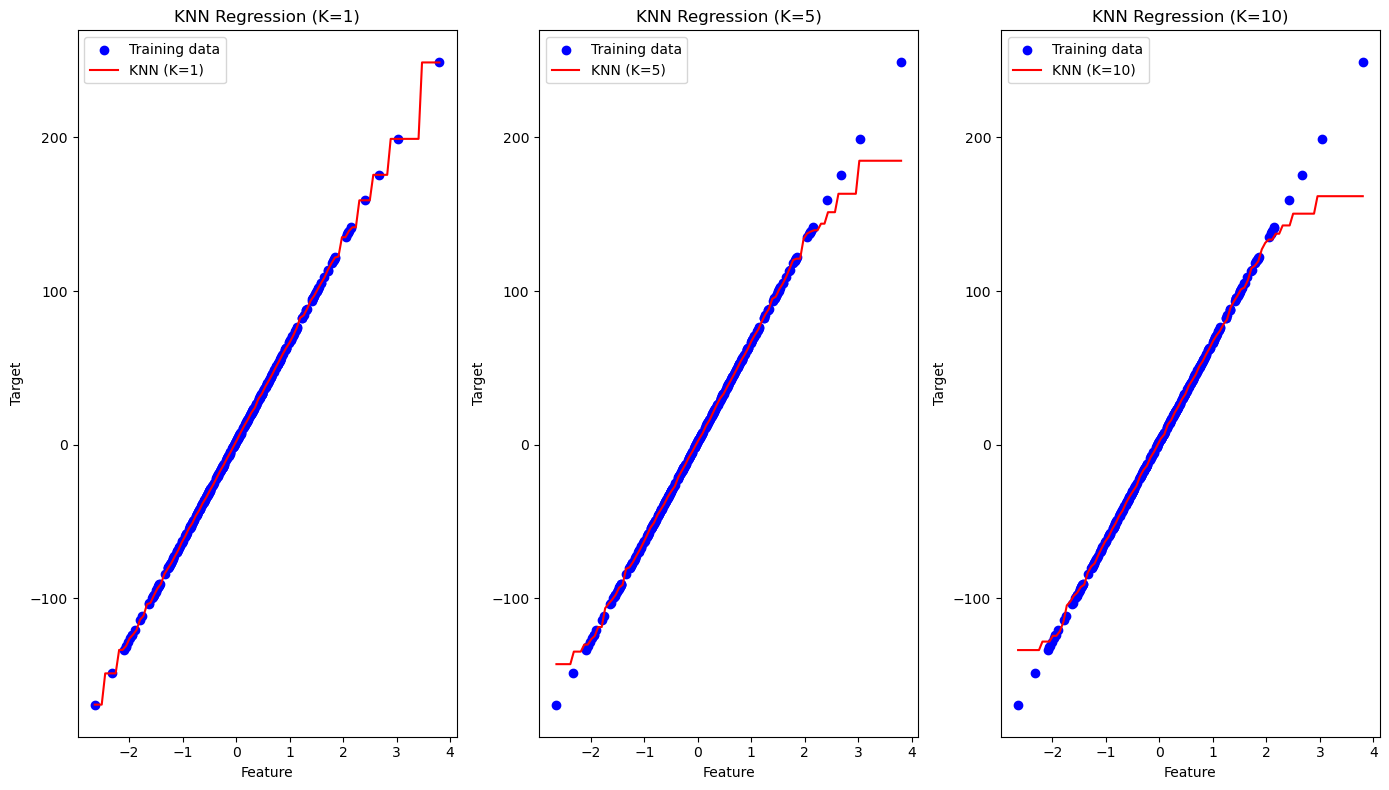

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Generate synthetic data for regression
X, y = make_regression(n_samples=500, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN regression
k_values = [1, 5, 10]
plt.figure(figsize=(14, 8))

for i, k in enumerate(k_values):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    
    X_range = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)
    y_pred = reg.predict(X_range)
    
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_train_scaled, y_train, color='blue', label='Training data')
    plt.plot(X_range, y_pred, color='red', label=f'KNN (K={k})')
    plt.title(f'KNN Regression (K={k})')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()

plt.tight_layout()
plt.show()


Question 58: Describe the boundary decision made by the KNN algorithm.

In [209]:
#Answer

The decision boundary in KNN is formed by the regions where the majority class of the nearest neighbors changes. This boundary is often non-linear and can be quite complex, depending on the distribution of the training data and the value of K. It essentially reflects the decision boundaries of the classes in the feature space.

Question 59: How do you choose the optimal value of K in KNN?

In [211]:
#Answer

To choose the optimal value of K:

Cross-Validation: Use k-fold cross-validation to evaluate different values of K and select the one with the best performance on validation data.
Grid Search: Perform a grid search over a range of K values to identify the best one.
Validation Curve: Plot the validation error or accuracy for different K values to visualize and choose the optimal K.


Question 60: Discuss the trade-offs between using a small and large value of K in KNN.

In [213]:
#Answer

Small K (e.g., K=1):

Pros: More sensitive to the local structure of the data; can capture complex patterns.
Cons: Prone to noise and overfitting; may lead to high variance in predictions.
Large K:

Pros: Smoother decision boundary; more robust to noise and less likely to overfit.
Cons: May lead to underfitting; the decision boundary can be too smooth and may not capture local patterns well.


Question 61: Explain the process of feature scaling in the context of KNN.

In [215]:
#Answer

Feature scaling is essential for KNN because the algorithm relies on distance calculations. If features are on different scales, those with larger scales will dominate the distance metric, skewing the results. Common scaling techniques include:

Normalization: Rescales features to a range [0, 1].
Standardization: Centers features around zero and scales them to have unit variance.
Python Example

Question 62: Compare and contrast KNN with other classification algorithms like SVM and Decision Trees.

In [217]:
#Answer

Comparison:

KNN: Simple, non-parametric, and instance-based. It requires choosing a distance metric and the number of neighbors (K). It can be slow for large datasets since it needs to compute distances to all points.
SVM: Uses hyperplanes to separate classes with a maximum margin. It can handle high-dimensional spaces and is effective for small to medium-sized datasets. Requires kernel choice and regularization parameters.
Decision Trees: A tree-like model of decisions and their possible consequences. It’s interpretable, handles both numerical and categorical data, and is fast with large datasets. However, it can overfit and may need pruning.

Question 63: How does the choice of distance metric affect the performance of KNN?

In [219]:
#Answer

Explanation: The distance metric in K-Nearest Neighbors (KNN) determines how distances between data points are calculated. Common metrics include Euclidean, Manhattan, and Minkowski. The choice of metric can affect KNN's performance because different metrics can highlight or suppress different aspects of the data's structure. For example, Euclidean distance may work better for continuous numerical data, while Manhattan distance may be better for data with categorical features.

In [121]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN with different distance metrics
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy with {metric} distance: {accuracy_score(y_test, y_pred):.2f}")


Accuracy with euclidean distance: 1.00
Accuracy with manhattan distance: 1.00


Question 64: What are some techniques to deal with imbalanced datasets in KNN?

In [221]:
#Answer

Explanation: Imbalanced datasets occur when some classes are underrepresented compared to others. Techniques to handle imbalanced datasets include:

Resampling: Either oversample the minority class or undersample the majority class.
Class Weights: Assign higher weights to minority classes to make them more significant during training.
Synthetic Data Generation: Use methods like SMOTE to generate synthetic examples for the minority class.


In [124]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

# Generate an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1,
                           flip_y=0, n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Resampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train KNN on resampled data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_res, y_res)
y_pred = knn.predict(X_test)
print(f"Accuracy with SMOTE: {accuracy_score(y_test, y_pred):.2f}")


Accuracy with SMOTE: 1.00


Question 65: Explain the concept of cross-validation in the context of tuning KNN parameters.

In [223]:
#Answer

Explanation: Cross-validation is a technique to evaluate a model's performance by dividing the data into multiple folds. For KNN, it helps in tuning hyperparameters like the number of neighbors (k). The data is split into training and validation sets multiple times, and the model is trained and tested on these different subsets to ensure that it generalizes well.



In [127]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Define the model and parameters
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")


Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.98


Question 66: What is the difference between uniform and distance-weighted voting in KNN?

In [225]:
#Answer

Explanation: In KNN, voting can be done in two ways:

Uniform Voting: Each neighbor contributes equally to the classification decision.
Distance-Weighted Voting: Neighbors closer to the query point have a higher influence on the classification.


In [130]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN with uniform voting
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)

# Train KNN with distance-weighted voting
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)

print(f"Accuracy with uniform voting: {accuracy_score(y_test, y_pred_uniform):.2f}")
print(f"Accuracy with distance-weighted voting: {accuracy_score(y_test, y_pred_distance):.2f}")


Accuracy with uniform voting: 1.00
Accuracy with distance-weighted voting: 1.00


Question 67: Discuss the computational complexity of KNN.

In [227]:
#Answer

Explanation: The computational complexity of KNN can be summarized as follows:

Training Time: O(1) - No explicit training phase, as the model stores the training data.
Prediction Time: O(n) - For each query, KNN calculates the distance to all n training samples.
Space Complexity: O(n * d) - Stores n samples each with d features.


In [133]:
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Measure prediction time
start_time = time.time()
knn.predict(X_test)
end_time = time.time()

print(f"Prediction time: {end_time - start_time:.5f} seconds")


Prediction time: 0.00844 seconds


Question 68: How does the choice of distance metric impact the sensitivity of KNN to outliers?

In [229]:
#Answer

The choice of distance metric in KNN (K-Nearest Neighbors) significantly impacts its sensitivity to outliers. Common distance metrics include Euclidean, Manhattan, and Minkowski distances.

Euclidean Distance: Measures the straight-line distance between two points in Euclidean space. It's sensitive to outliers because a single large difference in one feature can dominate the distance calculation.
Manhattan Distance: Measures the sum of absolute differences between coordinates. It's less sensitive to outliers compared to Euclidean distance but can still be influenced by them.
Minkowski Distance: Generalizes Euclidean and Manhattan distances and can be tuned to be more or less sensitive to outliers by adjusting the parameter p.
Outliers can distort the distance measurements, leading to incorrect nearest neighbors and thus affecting the classification or regression outcome.

Accuracy with different distance metrics:
euclidean: 0.79
manhattan: 0.81
minkowski: 0.79


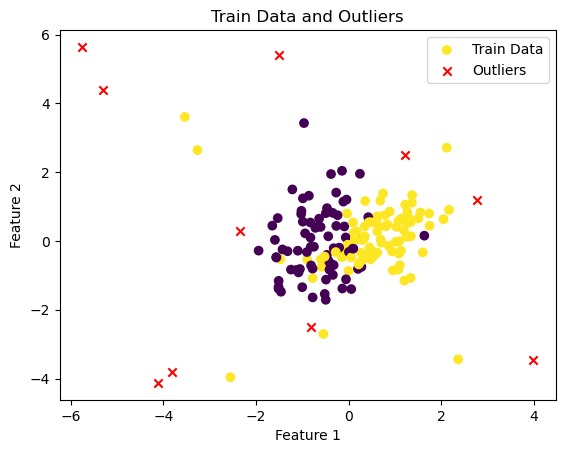

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

# Add outliers
np.random.seed(42)
outliers = np.random.uniform(low=-6, high=6, size=(10, 2))
X = np.vstack((X, outliers))
y = np.hstack((y, np.random.randint(0, 2, size=10)))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN with different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski']
results = {}
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    results[metric] = score

print("Accuracy with different distance metrics:")
for metric, score in results.items():
    print(f"{metric}: {score:.2f}")

# Visualize the impact of outliers
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', label='Train Data')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
plt.title("Train Data and Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Question 69: Explain the process of selecting an appropriate value for K using the elbow method.

In [231]:
#Answer

The elbow method is a technique used to determine the optimal number of neighbors (K) in KNN. It involves plotting the error rate (or accuracy) against different values of K and looking for an "elbow point" where the rate of improvement slows down significantly. This point represents a balance between overfitting (too few neighbors) and underfitting (too many neighbors).

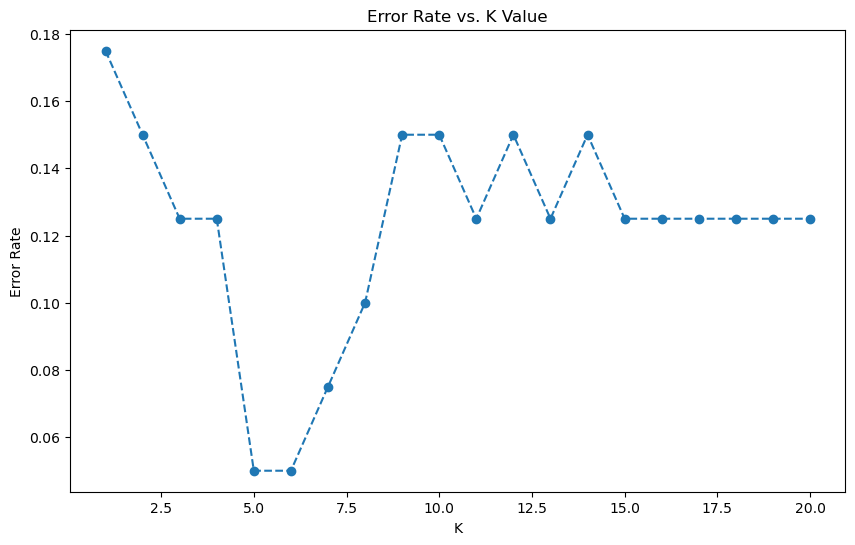

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Determine the optimal K using the elbow method
error_rates = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate = np.mean(pred_k != y_test)
    error_rates.append(error_rate)

# Plot the error rate against K
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='--')
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()


Question 70: Can KNN be used for text classification tasks? If yes, how?

In [233]:
#Answer

Yes, KNN can be used for text classification tasks. The key is to convert the text data into a numerical format that KNN can process. Common techniques include:

Bag of Words (BoW): Representing text as a fixed-length vector based on word counts.
TF-IDF (Term Frequency-Inverse Document Frequency): Adjusting word counts by their frequency in the document and across all documents.
Word Embeddings: Using pre-trained embeddings like Word2Vec or GloVe to convert words into dense vectors.
Once the text data is transformed, it can be fed into the KNN algorithm for classification.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Transform text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


Question 71: How do you decide the number of principal components to retain in PCA?

In [235]:
#Answer

The number of principal components to retain in PCA (Principal Component Analysis) is typically decided based on the explained variance. The cumulative explained variance ratio is plotted, and the number of components is chosen where the curve levels off, indicating that adding more components does not significantly increase the explained variance. This is similar to the elbow method used in KNN.

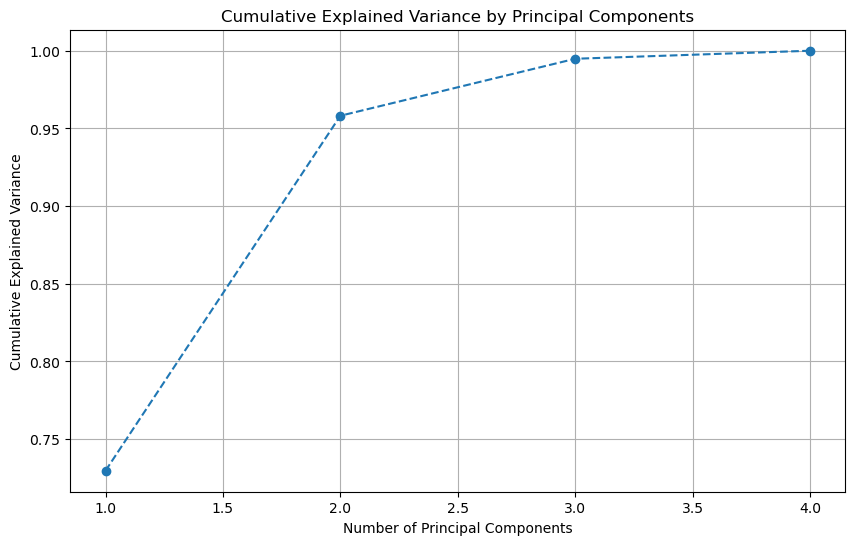

Number of components to retain: 2


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_iris()
X = data.data

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X)

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Number of components to retain
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain: {n_components}")


Question 72: Explain the reconstruction error in the context of PCA.

In [237]:
#Answer

Reconstruction error in PCA is the difference between the original data and the data reconstructed from the principal components. It measures the loss of information due to dimensionality reduction. Lower reconstruction error indicates that the principal components retain more of the original data's variance. It's calculated as the mean squared error between the original and reconstructed data.

In [15]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_iris()
X = data.data

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Reconstruct the data from principal components
X_reconstructed = pca.inverse_transform(X_pca)

# Calculate reconstruction error
reconstruction_error = mean_squared_error(X, X_reconstructed)
print(f"Reconstruction Error: {reconstruction_error:.4f}")


Reconstruction Error: 0.0419


Question 73: What are the applications of PCA in real-world scenarios?

In [239]:
#Answer

PCA (Principal Component Analysis) is widely used in various real-world scenarios for dimensionality reduction, noise reduction, and visualization. Some key applications include:

Image Compression: Reducing the dimensionality of image data while preserving significant features.
Face Recognition: Extracting essential features from facial images for recognition systems.
Genomics: Analyzing high-dimensional gene expression data to identify patterns and reduce complexity.
Finance: Identifying key factors that influence market movements from high-dimensional financial data.
Data Visualization: Projecting high-dimensional data into 2D or 3D for easier visualization and interpretation.

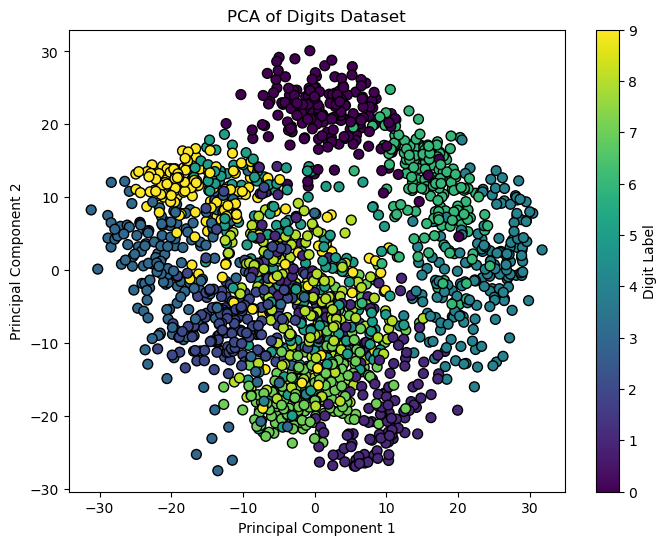

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load dataset (e.g., digits dataset)
digits = load_digits()
X = digits.data

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Digit Label')
plt.title('PCA of Digits Dataset')
plt.show()


Question 74: Discuss the limitations of PCA.

In [241]:
#Answer

PCA has several limitations:

Linearity: PCA assumes linear relationships between features, making it less effective for non-linear data structures.
Variance Preservation: PCA maximizes variance but may not capture important structures unrelated to variance.
Sensitivity to Scaling: PCA is sensitive to the scale of the data. Features need to be standardized or normalized.
Interpretability: The principal components are linear combinations of original features, which can be difficult to interpret.
Noise Sensitivity: PCA can be influenced by noise, as it tries to capture the directions of maximum variance, which may include noise components.

Question 75: What is Singular Value Decomposition (SVD), and how is it related to PCA?

In [243]:
#Answer

Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix 
𝐴
A into three matrices 
𝑈
U, 
Σ
Σ, and 
𝑉
𝑇
V 
T
  such that 
𝐴
=
𝑈
Σ
𝑉
𝑇
A=UΣV 
T
 . Here, 
𝑈
U and 
𝑉
V are orthogonal matrices, and 
Σ
Σ is a diagonal matrix with singular values.

PCA is closely related to SVD:

PCA can be performed using SVD by decomposing the centered data matrix.
The principal components are obtained from the right singular vectors (columns of 
𝑉
V).
The singular values in 
Σ
Σ relate to the eigenvalues of the covariance matrix used in PCA.

In [22]:
import numpy as np
from sklearn.decomposition import PCA
from numpy.linalg import svd

# Create a random matrix
np.random.seed(42)
A = np.random.randn(10, 5)

# Perform SVD
U, S, VT = svd(A)

# Compare with PCA
pca = PCA()
pca.fit(A)
print("Principal Components (PCA):")
print(pca.components_)

print("\nRight Singular Vectors (SVD):")
print(VT)


Principal Components (PCA):
[[-0.19140105  0.64514401 -0.30640856 -0.22650162  0.63400762]
 [ 0.24462942  0.30162525  0.45450065  0.75905736  0.25775906]
 [ 0.908652    0.07329169  0.06907329 -0.3946124   0.09214015]
 [ 0.2271501  -0.45332605 -0.68266928  0.39935136  0.34260688]
 [ 0.16210015  0.53097574 -0.47826195  0.23943367 -0.63696572]]

Right Singular Vectors (SVD):
[[ 0.00873191  0.47249714 -0.12153129  0.42361056  0.76318703]
 [ 0.2993184  -0.35673971  0.39901783  0.77561015 -0.14952904]
 [-0.22406266 -0.63910851 -0.68768238  0.18243788  0.18747161]
 [-0.90892276  0.14005055  0.18523502  0.28081223 -0.20267643]
 [ 0.18435723  0.47054158 -0.56462009  0.32686985 -0.56476834]]


Question 76: Explain the concept of latent semantic analysis (LSA) and its application in natural language processing.

In [245]:
#Answer

Latent Semantic Analysis (LSA) is a technique in natural language processing (NLP) that uses SVD to reduce the dimensionality of text data and uncover the latent semantic structure. It transforms the term-document matrix into a lower-dimensional space, capturing relationships between terms and documents.

Applications in NLP:

Information Retrieval: Enhancing search results by capturing synonyms and related concepts.
Document Similarity: Measuring the similarity between documents based on latent topics.
Topic Modeling: Identifying underlying topics in a collection of documents.
Text Summarization: Extracting key information from text.

In [25]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
documents = [
    "The cat in the hat",
    "A cat is a fine pet.",
    "Dogs and cats are great.",
    "I love my dog."
]

# Convert text data to TF-IDF matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Apply LSA using TruncatedSVD
lsa = TruncatedSVD(n_components=2)
X_lsa = lsa.fit_transform(X)

print("LSA Components:")
print(lsa.components_)

print("\nTransformed Document-Term Matrix:")
print(X_lsa)


LSA Components:
[[ 5.03069808e-17 -1.30104261e-16  4.80038900e-01 -3.81639165e-17
  -1.49186219e-16 -4.16333634e-17  3.50014580e-01 -4.16333634e-17
   2.58853896e-01  2.58853896e-01  3.50014580e-01 -1.49186219e-16
  -1.49186219e-16  3.50014580e-01  5.17707792e-01]
 [ 1.57027177e-01  1.57027177e-01  4.16333634e-16  1.57027177e-01
   5.40589903e-01  1.57027177e-01  2.22044605e-16  1.57027177e-01
  -5.55111512e-17 -5.55111512e-17  2.22044605e-16  5.40589903e-01
   5.40589903e-01  2.22044605e-16 -1.11022302e-16]]

Transformed Document-Term Matrix:
[[ 7.50644087e-01 -1.87494275e-18]
 [ 7.50644087e-01  5.22517508e-16]
 [-8.99918631e-17  3.51123442e-01]
 [-2.58398111e-16  9.36329178e-01]]


Question 77: What are some alternatives to PCA for dimensionality reduction?

In [247]:
#Answer

Several alternatives to PCA for dimensionality reduction include:

t-SNE (t-Distributed Stochastic Neighbor Embedding): A non-linear technique that preserves local structure and is used for visualization of high-dimensional data.
UMAP (Uniform Manifold Approximation and Projection): Another non-linear method that emphasizes both global and local data structure.
ICA (Independent Component Analysis): A method that focuses on statistical independence and is often used in signal processing.
LDA (Linear Discriminant Analysis): A supervised technique that maximizes class separability.
Autoencoders: Neural network-based methods that learn compressed representations of data.

Question 78: Describe t-distributed Stochastic Neighbor Embedding (t-SNE) and its advantages over PCA.

In [249]:
#Answer

t-distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique used for embedding high-dimensional data into a lower-dimensional space (typically 2D or 3D) for visualization. It models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points.

Advantages over PCA:

Captures Non-linear Relationships: t-SNE is better at capturing complex, non-linear relationships between data points.
Local Structure Preservation: t-SNE focuses on preserving the local structure of the data, making it more effective for clustering and visualization tasks.
Visualization: t-SNE is particularly useful for visualizing high-dimensional data in a low-dimensional space, often revealing patterns and clusters that are not visible with PCA.

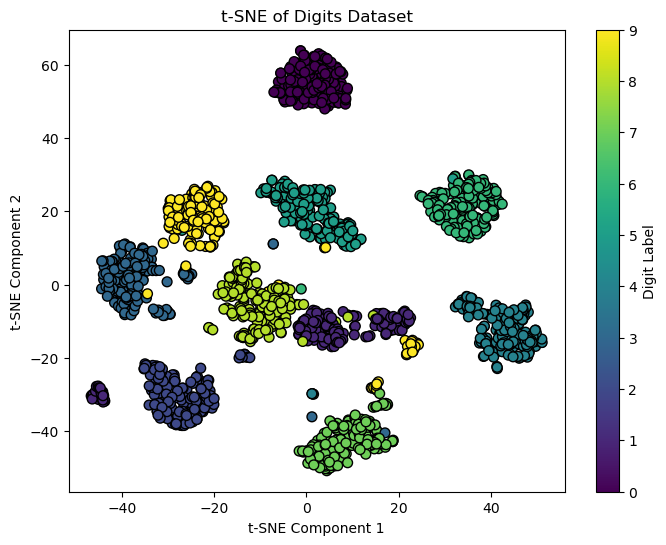

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Load dataset (e.g., digits dataset)
digits = load_digits()
X = digits.data
y = digits.target

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE of Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Digit Label')
plt.show()


Question 79: How does t-SNE preserve local structure compared to PCA?

In [251]:
#Answer

t-SNE preserves local structure by minimizing the divergence between two distributions: one representing pairwise similarities of the data points in the high-dimensional space and one representing pairwise similarities of the corresponding low-dimensional points. This is achieved through the following steps:

High-dimensional Similarities: Compute pairwise similarities of data points in the high-dimensional space using a Gaussian distribution.
Low-dimensional Similarities: Compute pairwise similarities of data points in the low-dimensional space using a Student's t-distribution, which has heavier tails than the Gaussian distribution.
Cost Function: Minimize the Kullback-Leibler divergence between the high-dimensional and low-dimensional similarity distributions.
In contrast, PCA preserves global structure by maximizing the variance along principal components and does not focus on local relationships between data points.

Question 80: Discuss the limitations of t-SNE.

In [253]:
#Answer

Despite its strengths, t-SNE has several limitations:

Computational Complexity: t-SNE can be computationally intensive, making it impractical for very large datasets.
Parameter Sensitivity: t-SNE requires careful tuning of parameters such as perplexity and learning rate, which can significantly affect the results.
Non-deterministic Results: The results of t-SNE can vary between runs due to its random initialization and optimization process.
Interpretability: The resulting low-dimensional embeddings are not as interpretable as the principal components from PCA.
Preservation of Global Structure: t-SNE focuses on local structure and may not preserve global relationships as well as PCA.

Question 81: What is the difference between PCA and Independent Component Analysis (ICA)?

In [255]:
#Answer

PCA and ICA are both dimensionality reduction techniques but they serve different purposes and are based on different assumptions.

PCA (Principal Component Analysis):

Assumption: Maximizes variance and assumes orthogonal linear combinations.
Goal: Reduce dimensionality while preserving as much variance as possible.
Components: Principal components are orthogonal to each other.
Application: Used for noise reduction, data compression, and visualization.
ICA (Independent Component Analysis):

Assumption: Maximizes statistical independence among the components.
Goal: Separate a multivariate signal into additive, independent non-Gaussian components.
Components: Independent components are not necessarily orthogonal.
Application: Used in blind source separation, such as separating audio signals in a cocktail party problem.



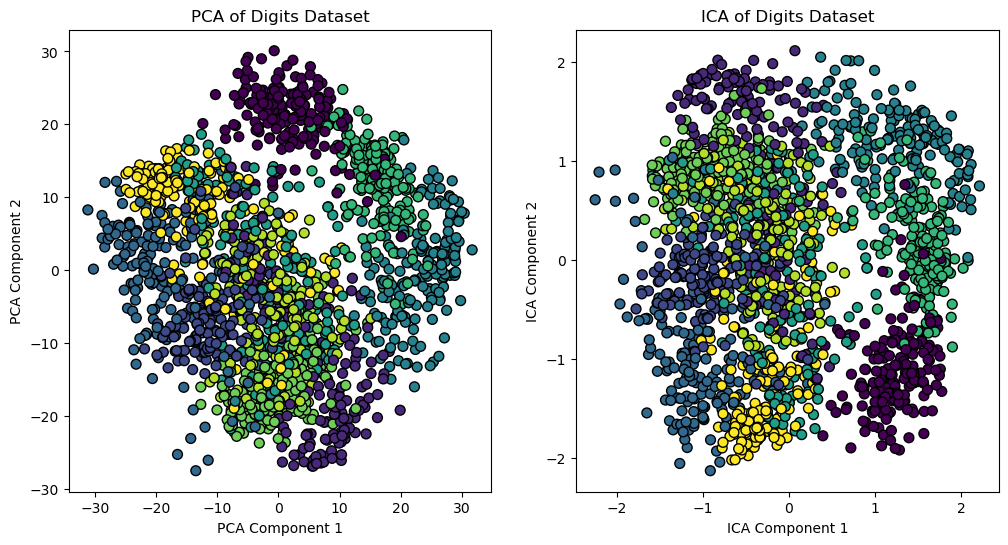

In [36]:
import numpy as np
from sklearn.decomposition import PCA, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load dataset (e.g., digits dataset)
digits = load_digits()
X = digits.data

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap='viridis', edgecolor='k', s=50)
ax[0].set_title('PCA of Digits Dataset')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

ax[1].scatter(X_ica[:, 0], X_ica[:, 1], c=digits.target, cmap='viridis', edgecolor='k', s=50)
ax[1].set_title('ICA of Digits Dataset')
ax[1].set_xlabel('ICA Component 1')
ax[1].set_ylabel('ICA Component 2')

plt.show()


Question 82: Explain the concept of manifold learning and its significance in dimensionality reduction.

In [257]:
#Answer

Manifold learning is a type of non-linear dimensionality reduction technique that assumes high-dimensional data lies on a low-dimensional manifold embedded within the higher-dimensional space. The goal is to uncover this manifold and represent the data in a lower-dimensional space that preserves its intrinsic geometry.

Significance:

Non-linear Relationships: Manifold learning methods can capture complex, non-linear relationships in data that linear methods like PCA cannot.
Preservation of Local and Global Structure: These methods aim to preserve the local and/or global structure of the data, making them useful for tasks such as visualization, clustering, and classification.
Popular Manifold Learning Algorithms:

t-SNE (t-distributed Stochastic Neighbor Embedding): Focuses on preserving local relationships.
UMAP (Uniform Manifold Approximation and Projection): Balances local and global structure preservation.
Isomap: Preserves global geometric structure by maintaining geodesic distances between data points.
LLE (Locally Linear Embedding): Preserves local linear relationships among data points.

Question 83: What are autoencoders, and how are they used for dimensionality reduction?

In [259]:
#Answer

Autoencoders are a type of artificial neural network used for unsupervised learning. They consist of an encoder and a decoder. The encoder maps the input data to a lower-dimensional latent space, and the decoder maps this representation back to the original input space. The goal is to minimize the reconstruction error, which is the difference between the input and the reconstructed output.

Usage for Dimensionality Reduction:
Autoencoders can be used for dimensionality reduction by training the network to learn a compressed representation of the data in the latent space. This latent representation can then be used for tasks such as data visualization, clustering, or as input features for other machine learning models.

Question 84: Discuss the challenges of using nonlinear dimensionality reduction techniques.

In [261]:
#Answer

Nonlinear dimensionality reduction techniques, such as t-SNE, UMAP, and Isomap, can effectively capture complex structures in data but come with several challenges:

Computational Complexity: These methods can be computationally expensive, making them less practical for very large datasets.
Parameter Sensitivity: Many nonlinear techniques require careful tuning of parameters, such as perplexity in t-SNE or the number of neighbors in UMAP, which can significantly impact the results.
Scalability: Nonlinear methods may not scale well with increasing data size, both in terms of computation time and memory usage.
Interpretability: The resulting low-dimensional representations are often less interpretable compared to linear methods like PCA.
Reproducibility: Techniques like t-SNE can produce different results on different runs due to random initialization and stochastic optimization processes.
Overfitting: There is a risk of overfitting the noise in the data, particularly with complex nonlinear transformations.


Question 85: How does the choice of distance metric impact the performance of dimensionality reduction techniques?

In [263]:
#Answer

The choice of distance metric plays a crucial role in the performance of dimensionality reduction techniques because it defines how the similarity or dissimilarity between data points is measured. Different distance metrics can lead to different representations of the data in the lower-dimensional space.

Euclidean Distance: Commonly used in linear techniques like PCA and some nonlinear techniques like t-SNE. Assumes uniform scaling across all dimensions.
Manhattan Distance: May be more appropriate for data where differences are more meaningful when summed across dimensions.
Cosine Similarity: Useful for text data and high-dimensional data where the angle between vectors is more informative than their magnitude.
Mahalanobis Distance: Takes into account correlations between variables and can provide better performance when features have different variances and are correlated.
The choice of distance metric should be informed by the nature of the data and the specific characteristics that need to be preserved in the lower-dimensional representation.

Question 86: What are some techniques to visualize high-dimensional data after dimensionality reduction?

In [265]:
#Answer

After dimensionality reduction, high-dimensional data can be visualized using various techniques:

2D and 3D Scatter Plots: When dimensionality reduction results in 2 or 3 dimensions, scatter plots are useful.
t-SNE (t-Distributed Stochastic Neighbor Embedding): Effective for visualizing high-dimensional data in 2D or 3D, preserving local structures.
PCA (Principal Component Analysis): Projects data onto the principal components which can be visualized in 2D or 3D.
UMAP (Uniform Manifold Approximation and Projection): Similar to t-SNE but often faster and scalable to larger datasets.
Heatmaps: For visualizing the relationships between reduced dimensions or clusters.


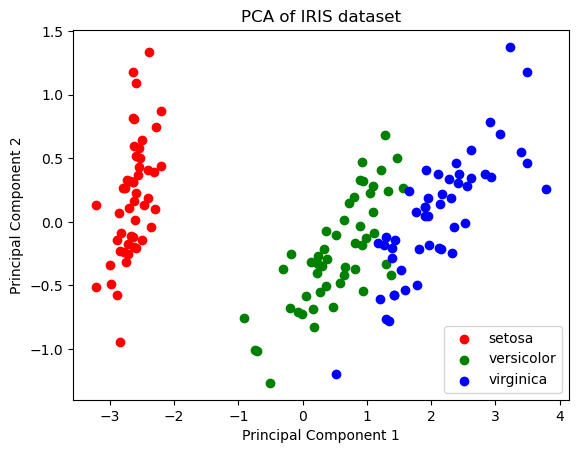

In [283]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Apply PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Plot results
plt.figure()
for color, i, target_name in zip('rgb', [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()


Question 87: Explain the concept of feature hashing and its role in dimensionality reduction.

In [267]:
#Answer

Feature Hashing, also known as the Hashing Trick, is a technique to convert categorical variables into numerical vectors using a hash function. It maps features to a fixed-size vector space, which helps in reducing dimensionality. This approach is particularly useful when dealing with large categorical datasets.

Role in Dimensionality Reduction:

Reduces the dimensionality of the feature space by hashing features into a smaller, fixed-size vector.
Simplifies data processing and reduces memory usage.
Can lead to hash collisions where different features map to the same hash bucket, but this is often a trade-off for reduced dimensionality.

Question 88: What is the difference between global and local feature extraction methods?

In [269]:
#Answer

Global Feature Extraction:

Focuses on the entire dataset or sample as a whole.
Examples: Principal Component Analysis (PCA) extracts global features by finding the directions of maximum variance in the entire dataset.
Advantages: Provides a global perspective of the data's structure.


Local Feature Extraction:

Focuses on local regions or subsets of data.
Examples: Local Binary Patterns (LBP) in image processing, which analyzes local texture around each pixel.
Advantages: Captures detailed and localized information, useful for identifying patterns in specific regions.

Question 89: How does feature sparsity affect the performance of dimensionality reduction techniques?

In [271]:
#Answer

Sparsity refers to having many zero values in the feature vectors.
Effect on Dimensionality Reduction:
Can lead to inefficiencies in algorithms that assume dense features.
Techniques like PCA may not perform well with sparse data because they are designed for dense matrices.
Specialized algorithms like Truncated SVD or dimensionality reduction methods designed for sparse matrices (e.g., LSA for text data) are more effective.

Question 90: Discuss the impact of outliers on dimensionality reduction algorithms.

In [273]:
#Answer

Impact of Outliers:

Outliers can significantly affect dimensionality reduction techniques like PCA, as these methods are sensitive to extreme values.
PCA: Outliers can skew the principal components, leading to misleading results.
Robust Methods: Techniques like Robust PCA or outlier detection pre-processing steps can help mitigate the impact of outliers.

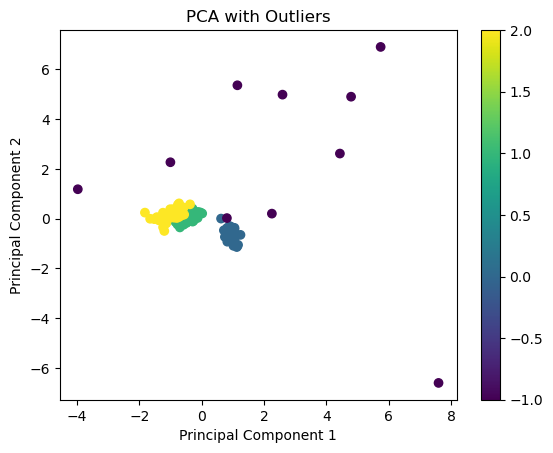

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset and add outliers
data = load_iris()
X = data.data
y = data.target

# Introduce outliers
np.random.seed(0)
outliers = np.random.uniform(low=-10, high=10, size=(10, X.shape[1]))
X_with_outliers = np.vstack([X, outliers])
y_with_outliers = np.concatenate([y, np.full(10, -1)])

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_outliers)

# Apply PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)

# Plot results
plt.figure()
scatter = plt.scatter(X_r[:, 0], X_r[:, 1], c=y_with_outliers, cmap='viridis', marker='o')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Outliers')
plt.show()
